# Model with Multiple Output Layers

In [1]:
#Importing required libraries
from numpy import array
import keras
from keras.utils import plot_model
import pydot
from tensorflow.keras import backend as K
import keras.backend.common
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
#To enter your file just uncomment the below line and comment the 2nd line
#filename=input("Enter you file Name:")
filename='nlp_train.json'
import json

with open(filename) as f:
  data = json.load(f)

print(data)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
k_dict={}
for key in data:
    a={}
    a[data[key]['body']]=data[key]['emotion']
    k_dict[key]=a
with open('ready.json', 'w') as json_file:
  json.dump(k_dict, json_file)

In [4]:
import csv
inputFile = open('ready.json')
outputFile = open('final.csv', 'w')
data = json.load(inputFile)
inputFile.close() 
output = csv.writer(outputFile)
final_list=[]


def preprocess_text(sen):
   
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

   
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

   
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

output.writerow(["id","body","anger","anticipation","disgust","fear","joy","love","optimism","pessimism","sadness","surprise","trust","neutral"])
for value,key in enumerate(data):
    a=[]
    a.append(key)
    for body in data[key].keys():
        a.append(preprocess_text(body))
        for emotion in data[key][body]:
            e=data[key][body][emotion]
            if e:
                a.append(1)
            else:
                a.append(0)
    output.writerow(a)

In [5]:
file = pd.read_csv("final.csv")
file

,id,body,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,neutral
0,fkrr36o,He was answering question about the criticism ...,1,0,1,0,0,0,0,1,0,0,0,0
1,fjyfp0o,I going to start today discussion thread with ...,1,1,1,1,0,0,0,1,0,0,0,0
2,fibm0x7,By announcing the self quarantined it paints p...,1,1,1,1,0,0,0,1,0,0,0,0
3,fj9b4oj,Likewise sorry if offended you m not actually ...,1,0,1,1,0,0,0,1,0,0,0,0
4,fk04ri5,People infected by experience high fever cough...,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,fk6dgi5,LAUSD Superintendent Beutner gets additional c...,0,0,0,0,0,0,0,0,0,0,0,1
1486,fkehkor,The article for those who run into pay wall am...,0,1,0,1,0,0,1,1,0,0,0,0
1487,fipueyz,At least as for this case in Hokkaido Northern...,0,0,0,0,0,0,0,0,0,0,0,1
1488,fkedc6p,Yes you are correct rd war countries have it p...,1,0,1,1,0,0,0,1,1,0,0,0


In [6]:
filter = file["body"] != ""
file = file[filter]
file = file.dropna()

In [7]:
print(file["body"])

0       He was answering question about the criticism ...
1       I going to start today discussion thread with ...
2       By announcing the self quarantined it paints p...
3       Likewise sorry if offended you m not actually ...
4       People infected by experience high fever cough...
                              ...                        
1485    LAUSD Superintendent Beutner gets additional c...
1486    The article for those who run into pay wall am...
1487    At least as for this case in Hokkaido Northern...
1488    Yes you are correct rd war countries have it p...
1489    The US Government response and won even bother...
Name: body, Length: 1490, dtype: object


In [8]:
file_labels = file[["anger", "anticipation", "disgust", "fear", "joy", "love","optimism","pessimism","sadness","surprise","trust","neutral"]]
file_labels.head()
#File in required input format for model

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,neutral
0,1,0,1,0,0,0,0,1,0,0,0,0
1,1,1,1,1,0,0,0,1,0,0,0,0
2,1,1,1,1,0,0,0,1,0,0,0,0
3,1,0,1,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


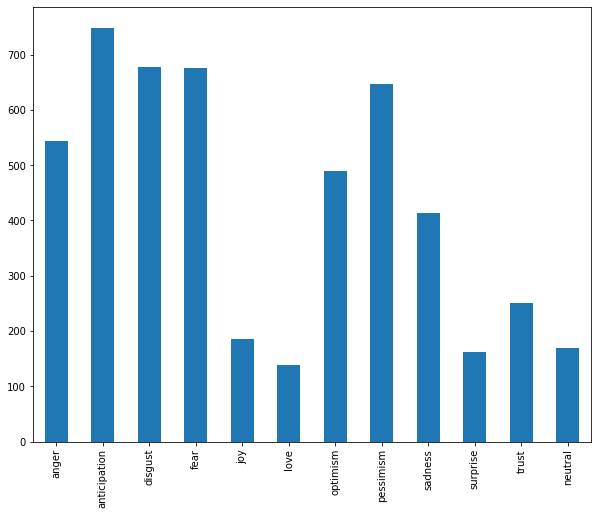

In [9]:
#Distribution of given data

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

file_labels.sum(axis=0).plot.bar()

In [10]:
X = []
sentences = list(file["body"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = file_labels

In [11]:
#Splitting Train-Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(y)

      anger  anticipation  disgust  fear  joy  love  optimism  pessimism  \
0         1             0        1     0    0     0         0          1   
1         1             1        1     1    0     0         0          1   
2         1             1        1     1    0     0         0          1   
3         1             0        1     1    0     0         0          1   
4         0             0        0     0    0     0         0          0   
...     ...           ...      ...   ...  ...   ...       ...        ...   
1485      0             0        0     0    0     0         0          0   
1486      0             1        0     1    0     0         1          1   
1487      0             0        0     0    0     0         0          0   
1488      1             0        1     1    0     0         0          1   
1489      1             0        1     1    0     0         0          0   

      sadness  surprise  trust  neutral  
0           0         0      0        0  
1  

In [12]:
# First output
y1_train = y_train[["anger"]].values
y1_test =  y_test[["anger"]].values

# Second output
y2_train = y_train[["anticipation"]].values
y2_test =  y_test[["anticipation"]].values

# Third output
y3_train = y_train[["disgust"]].values
y3_test =  y_test[["disgust"]].values

# Fourth output
y4_train = y_train[["fear"]].values
y4_test =  y_test[["fear"]].values

# Fifth output
y5_train = y_train[["joy"]].values
y5_test =  y_test[["joy"]].values

# Sixth output
y6_train = y_train[["love"]].values
y6_test =  y_test[["love"]].values

# Seventh output
y7_train = y_train[["optimism"]].values
y7_test =  y_test[["optimism"]].values

# Eight output
y8_train = y_train[["pessimism"]].values
y8_test =  y_test[["pessimism"]].values

# Ninth output
y9_train = y_train[["sadness"]].values
y9_test =  y_test[["sadness"]].values

# Tenth output
y10_train = y_train[["surprise"]].values
y10_test =  y_test[["surprise"]].values

# Eleventh output
y11_train = y_train[["trust"]].values
y11_test =  y_test[["trust"]].values

# Twelth output
y12_train = y_train[["neutral"]].values
y12_test =  y_test[["neutral"]].values


In [13]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [14]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [15]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='relu')(LSTM_Layer1)
#output1 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output1 = Dense(1, activation='relu')(output1)

output2 = Dense(1, activation='relu')(LSTM_Layer1)
#output2 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output2 = Dense(1, activation='relu')(output2)


output3 = Dense(1, activation='relu')(LSTM_Layer1)
#output3 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output3 = Dense(1, activation='relu')(output3)


output4 = Dense(1, activation='relu')(LSTM_Layer1)
#output4 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output4 = Dense(1, activation='relu')(output4)


output5 = Dense(1, activation='relu')(LSTM_Layer1)
#output5 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output5 = Dense(1, activation='relu')(output5)

output6 = Dense(1, activation='relu')(LSTM_Layer1)
#output6 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output6 = Dense(1, activation='relu')(output6)


output7 = Dense(1, activation='relu')(LSTM_Layer1)
#output7 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output7 = Dense(1, activation='relu')(output7)


output8 = Dense(1, activation='relu')(LSTM_Layer1)
#output8 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output8 = Dense(1, activation='relu')(output8)

output9 = Dense(1, activation='relu')(LSTM_Layer1)
#output9 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output9 = Dense(1, activation='relu')(output9)

output10 = Dense(1, activation='relu')(LSTM_Layer1)
#output10 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output10 = Dense(1, activation='relu')(output10)

output11 = Dense(1, activation='relu')(LSTM_Layer1)
#output11 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output11 = Dense(1, activation='relu')(output11)

output12 = Dense(1, activation='relu')(LSTM_Layer1)
#output12 = Dense(1, activation='sigmoid')(LSTM_Layer1)
#output12 = Dense(1, activation='relu')(output12)

model = Model(inputs=input_1, outputs=[output1, output2, output3, output4, output5, output6,output7, output8, output9, output10, output11, output12])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [16]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 200, 100)     2493000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 128)          117248      embedding_1[0][0]                
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 1)            129         lstm_1[0][0]                     
____________________________________________________________________________________________

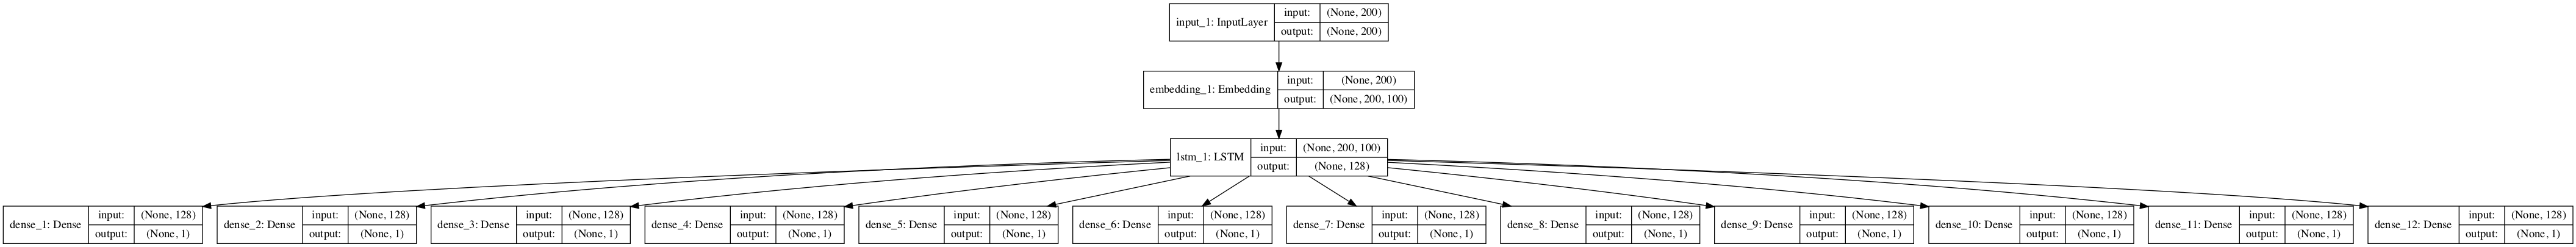

In [17]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4b.png', show_shapes=True, show_layer_names=True)


In [19]:
history = model.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train, y5_train, y6_train,y7_train, y8_train, y9_train, y10_train, y11_train, y12_train], batch_size=8192, epochs=20, verbose=1, validation_split=0.2)

Train on 953 samples, validate on 239 samples
Epoch 1/20
953/953 [==============================] - 18s 19ms/step - loss: 25.3669 - dense_1_loss: 0.9348 - dense_2_loss: 1.1276 - dense_3_loss: 5.3150 - dense_4_loss: 1.8256 - dense_5_loss: 1.6055 - dense_6_loss: 0.4700 - dense_7_loss: 4.5364 - dense_8_loss: 5.6972 - dense_9_loss: 0.9660 - dense_10_loss: 0.8372 - dense_11_loss: 0.6597 - dense_12_loss: 1.3919 - dense_1_acc: 0.5530 - dense_2_acc: 0.5929 - dense_3_acc: 0.5603 - dense_4_acc: 0.5593 - dense_5_acc: 0.8667 - dense_6_acc: 0.9014 - dense_7_acc: 0.6653 - dense_8_acc: 0.5698 - dense_9_acc: 0.7240 - dense_10_acc: 0.8898 - dense_11_acc: 0.6107 - dense_12_acc: 0.8835 - val_loss: 25.8753 - val_dense_1_loss: 0.9790 - val_dense_2_loss: 2.1403 - val_dense_3_loss: 6.0779 - val_dense_4_loss: 1.5328 - val_dense_5_loss: 1.3730 - val_dense_6_loss: 0.3814 - val_dense_7_loss: 4.4707 - val_dense_8_loss: 5.8669 - val_dense_9_loss: 0.7239 - val_dense_10_loss: 0.5044 - val_dense_11_loss: 0.6708 - val

Epoch 8/20
953/953 [==============================] - 23s 24ms/step - loss: 17.0148 - dense_1_loss: 0.9210 - dense_2_loss: 0.8426 - dense_3_loss: 0.8838 - dense_4_loss: 1.5206 - dense_5_loss: 0.9504 - dense_6_loss: 0.6306 - dense_7_loss: 4.4768 - dense_8_loss: 4.2373 - dense_9_loss: 0.8243 - dense_10_loss: 0.6358 - dense_11_loss: 0.4918 - dense_12_loss: 0.5998 - dense_1_acc: 0.4995 - dense_2_acc: 0.5782 - dense_3_acc: 0.5373 - dense_4_acc: 0.6076 - dense_5_acc: 0.7985 - dense_6_acc: 0.9045 - dense_7_acc: 0.6653 - dense_8_acc: 0.5698 - dense_9_acc: 0.5362 - dense_10_acc: 0.5887 - dense_11_acc: 0.8311 - dense_12_acc: 0.8835 - val_loss: 14.1642 - val_dense_1_loss: 0.9593 - val_dense_2_loss: 0.8620 - val_dense_3_loss: 0.9908 - val_dense_4_loss: 1.2305 - val_dense_5_loss: 1.0120 - val_dense_6_loss: 0.5155 - val_dense_7_loss: 4.4077 - val_dense_8_loss: 1.9035 - val_dense_9_loss: 0.7945 - val_dense_10_loss: 0.5797 - val_dense_11_loss: 0.5590 - val_dense_12_loss: 0.3499 - val_dense_1_acc: 0.52

Epoch 15/20
953/953 [==============================] - 15s 16ms/step - loss: 11.4899 - dense_1_loss: 0.8527 - dense_2_loss: 0.8203 - dense_3_loss: 0.8365 - dense_4_loss: 0.8434 - dense_5_loss: 0.9286 - dense_6_loss: 0.5413 - dense_7_loss: 3.8033 - dense_8_loss: 0.8152 - dense_9_loss: 0.6565 - dense_10_loss: 0.4665 - dense_11_loss: 0.4920 - dense_12_loss: 0.4338 - dense_1_acc: 0.5614 - dense_2_acc: 0.5887 - dense_3_acc: 0.5362 - dense_4_acc: 0.5740 - dense_5_acc: 0.8290 - dense_6_acc: 0.7345 - dense_7_acc: 0.6653 - dense_8_acc: 0.5813 - dense_9_acc: 0.7282 - dense_10_acc: 0.8594 - dense_11_acc: 0.8279 - dense_12_acc: 0.8783 - val_loss: 11.1678 - val_dense_1_loss: 0.8870 - val_dense_2_loss: 0.8673 - val_dense_3_loss: 0.8865 - val_dense_4_loss: 0.8788 - val_dense_5_loss: 1.0626 - val_dense_6_loss: 0.5523 - val_dense_7_loss: 3.0080 - val_dense_8_loss: 0.9817 - val_dense_9_loss: 0.6699 - val_dense_10_loss: 0.4587 - val_dense_11_loss: 0.5520 - val_dense_12_loss: 0.3630 - val_dense_1_acc: 0.5

In [20]:
score = model.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test, y5_test, y6_test, y7_test, y8_test, y9_test, y10_test, y11_test, y12_test], verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

298/298 [==============================] - 3s 11ms/step
Test Score: 8.470317462946744
Test Accuracy: 0.7518743276596069


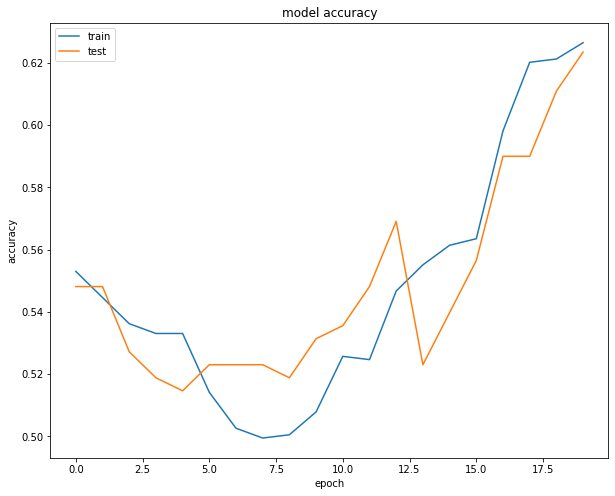

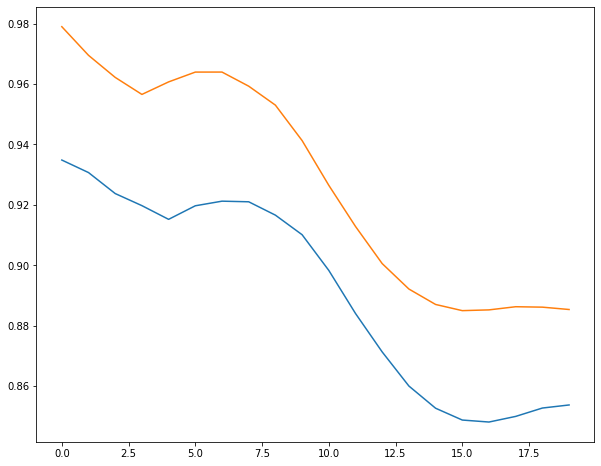

In [21]:
# import matplotlib.pyplot as plt

plt.plot(history.history['dense_1_acc'])
plt.plot(history.history['val_dense_1_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['dense_1_loss'])
plt.plot(history.history['val_dense_1_loss'])




# Test Accuracy: 75.2